In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

def binary_tree(num_leaves=16, depth=4):
    xs = list(range(num_leaves))
    xs = [x - 2 ** (depth - 1) + 0.5 for x in xs]
    leaves = xs
    edges = {'x': [], 'y': []}
    for depth in range(1, depth + 1):
        xs1 = [x + 0.5 * 2 ** (depth - 1) for x in xs[::2]]
        prev_depth = depth - 1 if depth > 1 else depth - 0.79
        for i in range(len(xs) // 2):
            edges['x'].extend([xs[2 * i], xs1[i], xs[2 * i + 1], None])
            edges['y'].extend([prev_depth, depth, prev_depth, None])
        if len(xs) % 2 == 1:
            edges['x'].extend([xs[-1], xs1[-1], None])
            edges['y'].extend([prev_depth, depth, None])
        xs = xs1
    return leaves, edges

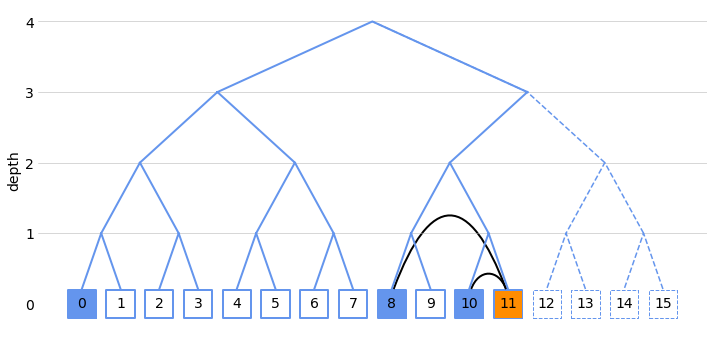

In [2]:
num_leaves = 12
depth = 4
leaves, edges = binary_tree(num_leaves, depth)
leaves_skip, edges_skip = binary_tree(2 ** depth - num_leaves, depth)
leaves_skip = [-x for x in leaves_skip]
edges_skip['x'] = [-x if x is not None else None for x in edges_skip['x']]
all_leaves = sorted(leaves + leaves_skip)

plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(12, 6))
ax = plt.gca()

c = 'cornflowerblue'
plt.plot(edges_skip['x'], edges_skip['y'], '--', c=c)
plt.plot(edges['x'], edges['y'], c=c, lw=2)
plt.scatter(leaves, [0] * len(leaves), marker='s', s=800, lw=2,
            facecolors='none', edgecolors=c)
plt.scatter([leaves[0], leaves[8], leaves[10]], [0, 0, 0], marker='s', s=800, c=c)
plt.scatter([leaves[-1]], [0], marker='s', s=800, c='darkorange', edgecolors=c)
plt.scatter(leaves_skip, [0] * len(leaves_skip), marker='s', s=800, linestyle='--',
            facecolors='none', edgecolors=c)
for i in range(2 ** depth):
    plt.annotate(str(i), [all_leaves[i], 0], ha='center', va='center')

# axes
ax.set_xticks([])
ax.set_yticks(range(1, depth + 1))
ax.set_yticks([0], minor=True)
ax.set_yticklabels('0', minor=True)
ax.set_ylabel('depth')
ax.tick_params(which='both', length=0)
plt.grid(axis='y', linewidth=0.5)
for spine in ax.spines.values():
    spine.set_visible(False)

# curves
codes = [mpl.path.Path.MOVETO, mpl.path.Path.CURVE4,
         mpl.path.Path.CURVE4, mpl.path.Path.CURVE4]

verts = [(2.55, 0.21), (2.75, 0.5), (3.25, 0.5), (3.45, 0.21)]
path = mpl.path.Path(verts, codes)
patch = mpl.patches.PathPatch(path, facecolor='none', lw=2)
ax.add_patch(patch)

verts = [(0.55, 0.21), (1.5, 1.6), (2.5, 1.6), (3.45, 0.21)]
path = mpl.path.Path(verts, codes)
patch = mpl.patches.PathPatch(path, facecolor='none', lw=2)
ax.add_patch(patch)

plt.savefig('binary_tree.pdf')
plt.show()